<a href="https://colab.research.google.com/github/Sohailm25/ML_Things/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"sohailmohammad","key":"7633c550dfc0f18e0e6ba913c15166f7"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import pandas as pd
import os

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
train.info()
'''
NOTES TO SELF


Age
Cabin 
Both aren't populated




'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


"\nNOTES TO SELF\n\n\nAge\nCabin \nBoth aren't populated\n\n\n\n\n"

In [6]:
train.head()
'''
NOTES TO SELF

Important Classes:
Survived
Pclass
Sex
Age
~SibSp
~Parch
Fare
Cabin



FORSURE to Drop:
PassengerId
Name
Ticket
Embarked

Maybe Drop:
SibSp (Does having a sibling affect their chances of survival bc they'll try to keep them safe?)
Parch (Does having a parent affect their chances of survival bc they'll try to keep them safe?)

Prediction Column:
Survived


'''

"\nNOTES TO SELF\n\nImportant Classes:\nSurvived\nPclass\nSex\nAge\n~SibSp\n~Parch\nFare\nCabin\n\n\n\nFORSURE to Drop:\nPassengerId\nName\nTicket\nEmbarked\n\nMaybe Drop:\nSibSp (Does having a sibling affect their chances of survival bc they'll try to keep them safe?)\nParch (Does having a parent affect their chances of survival bc they'll try to keep them safe?)\n\nPrediction Column:\nSurvived\n\n\n"

In [7]:
train["Sex"].value_counts()

# Only two classes, can recode into a binary variable

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


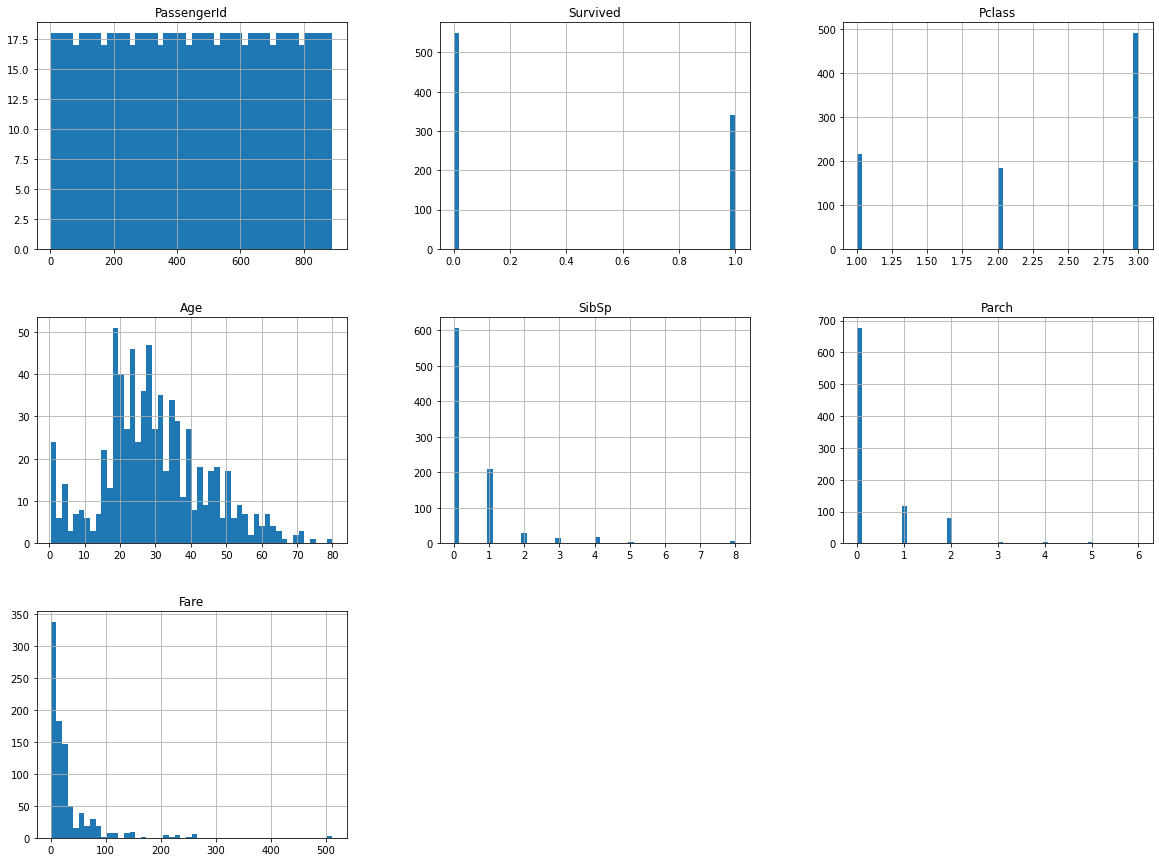

In [9]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# Check for correlations
# Since we're predicting survival, check correlation with survival
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

# is this meaningful because its a binary value?
# Fair and TicketClass (Pclass) are more correlated
# this only checks for LINEAR correlations though

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# Data Cleaning, Compensate for numerical values that aren't populated by filling it with the median

In [11]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

# need to make a copy of the dataset without the non-numerical attributes
train_num = train.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)

imputer.fit(train_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [12]:
# statistics_ holds the median of each attribute
imputer.statistics_

X = imputer.transform(train_num)
train_populated = pd.DataFrame(X,columns=train_num.columns,
                               index = train_num.index)

In [13]:
train_populated.info() # Numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


In [14]:
y_train = pd.DataFrame(train['Survived'], copy=True)
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
train_pure = train_populated.drop("Survived", axis=1)
train_pure

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,887.0,2.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,19.0,0.0,0.0,30.0000
888,889.0,3.0,28.0,1.0,2.0,23.4500
889,890.0,1.0,26.0,0.0,0.0,30.0000


In [16]:
# Convert Sex to Binary Values
def convert_to_binary(sex):
  if(sex == 'male'):
    return 0
  elif(sex == 'female'):
    return 1

new_sex = pd.DataFrame(columns=["Sex"])

i = 0
for passenger in train["Sex"]:
  new_sex.loc[i] = convert_to_binary(passenger)
  i += 1

train_concat = pd.concat([train_pure, new_sex], axis=1)

In [17]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [18]:
''' 

Feature Scaling

SKIP ON FIRST TRY

1. Min-Max Scaling
2. Standardization

Might want to do it on Fare

'''

' \n\nFeature Scaling\n\nSKIP ON FIRST TRY\n\n1. Min-Max Scaling\n2. Standardization\n\nMight want to do it on Fare\n\n'

# Training a Classifier

## SGD Linear 

In [19]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state = 42)
SGD.fit(train_concat, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
SGD.predict(train_concat.iloc[[4]])

array([0])

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(SGD, train_concat, y_train, cv=3, scoring = 'accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.64983165, 0.38383838, 0.62289562])

## Support Vector Machine

In [22]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(train_concat, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
cross_val_score(SVC, train_concat, y_train, cv=6, scoring = 'accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.61073826, 0.6442953 , 0.66442953, 0.64189189, 0.66216216,
       0.64864865])

## Use GridSearch/RandomizedSearch to find the best hyperparameters

In [24]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
        {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['auto', 'scale']}
]

SVC2 = SVC()

grid_search = GridSearchCV(SVC2, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(train_concat, y_train.values.ravel())
'''

"\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\n\nparam_grid = [\n        {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['auto', 'scale']}\n]\n\nSVC2 = SVC()\n\ngrid_search = GridSearchCV(SVC2, param_grid, cv=5,\n                           scoring = 'neg_mean_squared_error',\n                           return_train_score = True)\n\ngrid_search.fit(train_concat, y_train.values.ravel())\n"

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_grid = [
        {'kernel': ['linear','poly'], 'C': [0.1, 0.01, 1.0, 3, 5]},
        {'kernel': ['poly'],'degree': [3,5,7,9]}
]

SVC3 = SVC()

grid_search = RandomizedSearchCV(SVC3, param_grid, n_iter = 50,
                                  cv = 5, scoring = 'neg_mean_squared_error',
                                  return_train_score = True)

grid_search.fit(train_concat, y_train.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 14 is smaller than n_iter=50. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions=[{'C': [0.1, 0.01, 1.0, 3, 5],
                                         'kernel': ['linear', 'poly']},
                                        {'degree': [3, 5, 7, 9],
                                         'kernel': ['poly']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=0)

In [48]:
grid_search.best_params_

{'C': 5, 'kernel': 'linear'}

In [49]:
import numpy as np

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.4618045567360538 {'kernel': 'linear', 'C': 0.1}
0.6085666759142594 {'kernel': 'poly', 'C': 0.1}
0.49113029193460006 {'kernel': 'linear', 'C': 0.01}
0.6168190647052773 {'kernel': 'poly', 'C': 0.01}
0.4605796088047119 {'kernel': 'linear', 'C': 1.0}
0.5964450162926148 {'kernel': 'poly', 'C': 1.0}
0.46299237126365916 {'kernel': 'linear', 'C': 3}
0.593612559624073 {'kernel': 'poly', 'C': 3}
0.4568644515725258 {'kernel': 'linear', 'C': 5}
0.592665399224407 {'kernel': 'poly', 'C': 5}
0.5964450162926148 {'kernel': 'poly', 'degree': 3}
0.6057908983440387 {'kernel': 'poly', 'degree': 5}
0.5945582111526688 {'kernel': 'poly', 'degree': 7}
0.5850329147944429 {'kernel': 'poly', 'degree': 9}


In [50]:
SVC_new = SVC(**grid_search.best_params_)
cross_val_score(SVC_new, train_concat, y_train.values.ravel(), cv=6, scoring = 'accuracy')

array([0.72483221, 0.7852349 , 0.80536913, 0.79054054, 0.79054054,
       0.81081081])

## Confusion Matrix of predictions 

In [51]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVC_new, train_concat, y_train.values.ravel(), cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train.values.ravel(), y_train_pred)

array([[469,  80],
       [107, 235]])

In [52]:
# Calculate the precision and recall scores
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print("Precision: ", precision_score(y_train.values.ravel(), y_train_pred))
print("Recall:    ", recall_score(y_train.values.ravel(), y_train_pred))
print("F1 Score:  ", f1_score(y_train.values.ravel(), y_train_pred))

Precision:  0.746031746031746
Recall:     0.6871345029239766
F1 Score:   0.715372907153729


In [53]:
# Checking the threshold

# return decision scores
y_scores = cross_val_predict(SVC_new, train_concat, y_train.values.ravel(), cv=3,
                             method = "decision_function")

# compute precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train.values.ravel(), y_scores)



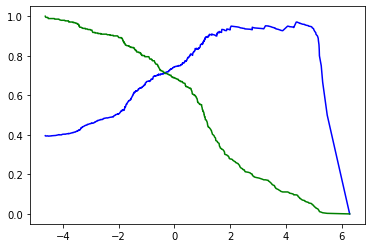

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b-", label = "Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

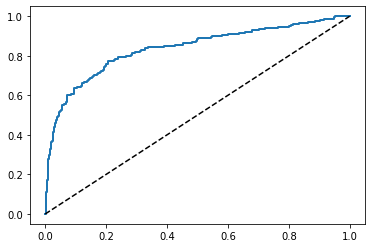

In [55]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train.values.ravel(), y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1], [0,1], 'k--')

plot_roc_curve(fpr,tpr)
plt.show()